# Example for lensed quasar

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis.output import Output

import matplotlib.pyplot as plt
import numpy as np

### create a `Processor` instance and point to the IO directory

In [2]:
processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [30]:
processor.swim(lens_name="lensed_quasar", model_id="example", log=False)

/Users/ajshajib/software_development/lenstronomy/lenstronomy/Data/psf.py:80: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:91: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(


Computing the PSO ...


/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:91: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x = scipy.optimize.fsolve(


10
20
30
40
50
Max iteration reached! Stopping.
-2.9543564641113056 reduced X^2 of best position
-21234.437085800007 log likelihood
14375 effective number of data points
[{'theta_E': 0.7009934681799821, 'gamma': 2.0, 'e1': 0.03448093879758888, 'e2': -0.06183174574374399, 'center_x': -0.14032294238408613, 'center_y': 0.07628311670997358}, {'gamma_ext': 0.04711197951944161, 'psi_ext': -0.5312073373240995, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.1882296692921403, 'n_sersic': 1.1317270464162146, 'e1': 0.019800496760823898, 'e2': -0.00023660224626942134, 'center_x': -0.1340560776451835, 'center_y': 0.07201742109215577}] source result
[{'amp': 1, 'R_sersic': 0.25442772459113, 'n_sersic': 4.0, 'e1': 0.027642098581831424, 'e2': -0.0018650336711929423, 'center_x': 0.016556272833727997, 'center_y': -0.04083875578372403}] lens light result
[{'ra_image': array([-0.52804281, -0.6910266 ,  0.18999014,  0.53522642]), 'dec_image': array([-0.48798151,  0.53417473,  0.67526171, -0.

  7%|▋         | 7/100 [00:11<02:43,  1.75s/it]/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in power
  alpha = 2 / (1 + q) * (b / R) ** t * R_omega
100%|██████████| 100/100 [03:05<00:00,  1.86s/it]

Computing the MCMC...
Number of walkers =  40
Burn-in iterations:  0
Sampling iterations (in current run): 100
187.7144787311554 time taken for MCMC sampling


## Let's check the output

In [31]:
output = Output("../io_directory_example/")

-2.9201157486590885 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.9201157486590885


/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),


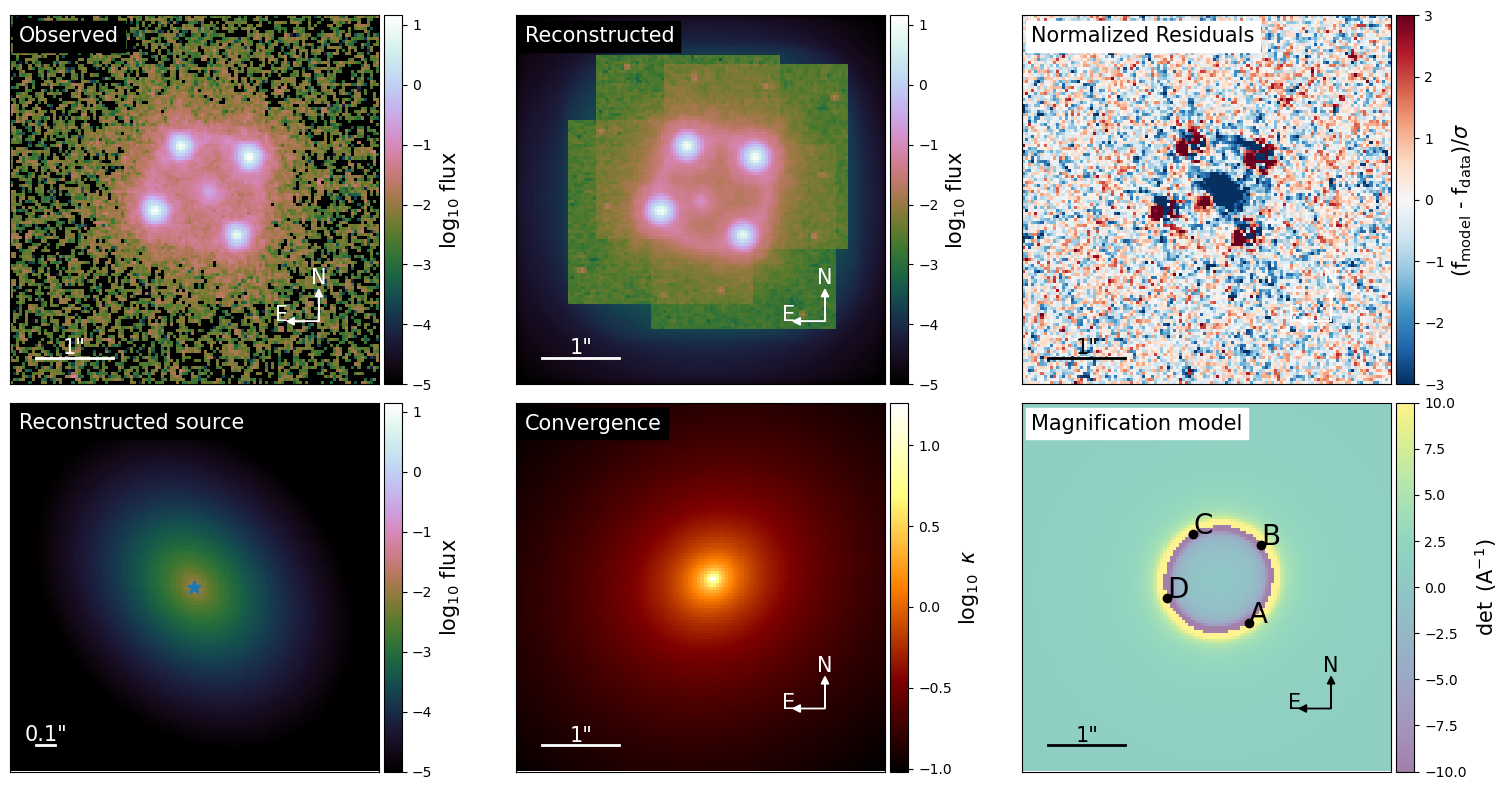

In [32]:
fig = output.plot_model_overview(lens_name="lensed_quasar", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [33]:
output.get_kwargs_data_joint("lensed_quasar")

{'multi_band_list': [[{'background_rms': 0.005410915240645,
    'dec_at_xy_0': -2.399111017814023,
    'exposure_time': array([[697.0825 , 503.49606, 679.8957 , ..., 934.47833, 959.3858 ,
            956.0639 ],
           [940.014  , 695.45166, 615.2481 , ..., 620.5439 , 962.6702 ,
            741.8869 ],
           [800.86237, 923.98846, 628.4555 , ..., 790.8768 , 964.92914,
            933.5784 ],
           ...,
           [960.678  , 958.5928 , 962.2539 , ..., 961.1977 , 963.7092 ,
            956.88763],
           [951.48285, 955.8999 , 964.3244 , ..., 959.7375 , 960.80963,
            961.0066 ],
           [605.2956 , 920.7195 , 952.1291 , ..., 964.6863 , 956.1972 ,
            957.31537]], dtype=float32),
    'image_data': array([[ 4.3253470e-03, -2.5759672e-03, -2.8244085e-03, ...,
             6.6894642e-04, -1.6578455e-03, -1.1933473e-04],
           [-2.3312846e-03,  2.5787833e-03,  8.7178568e-04, ...,
             3.5077034e-04,  5.7318993e-03, -4.9318239e-04],
         

/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_96777/1812399474.py:2: RuntimeWarning: invalid value encountered in log10
  np.log10(


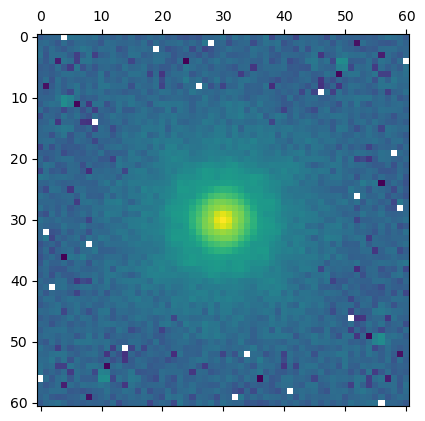

In [34]:
plt.matshow(
    np.log10(
        output.get_kwargs_data_joint("lensed_quasar")["multi_band_list"][0][1][
            "kernel_point_source"
        ]
    )
)

In [35]:
output.load_output(lens_name="lensed_quasar", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 0.701179819086541,
   'gamma': 2.0028856882326576,
   'e1': 0.02940846013478187,
   'e2': -0.06025818768813834,
   'center_x': -0.14028067608477154,
   'center_y': 0.0758328604208888},
  {'gamma_ext': 0.04510690133981761,
   'psi_ext': -0.5582958961011141,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'R_sersic': 0.1736357997849028,
   'n_sersic': 1.68765066337916,
   'e1': -0.009283333950285879,
   'e2': 0.12783178395990868,
   'center_x': -0.1343965827191282,
   'center_y': 0.0715451823411532}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 0.3009710970979689,
   'n_sersic': 4.0,
   'e1': 0.03165922795953919,
   'e2': 0.0012891748541139943,
   'center_x': 0.016095413880334218,
   'center_y': -0.040768590906081016}],
 'kwargs_ps': [{'ra_image': array([-0.53137338, -0.692126  ,  0.1921448 ,  0.53420458]),
   'dec_image': array([-0.48668235,  0.53243054,  0.67474808, -0.16273642]),
   'point_amp': array([1., 1., 1., 1.])}],
 'kwargs_spec

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [36]:
output.model_settings

{'band': ['F814W'],
 'pixel_size': [0.04],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'point_source_option': {'ra_init': [-0.54, -0.69, 0.19, 0.55],
  'dec_init': [-0.48, 0.54, 0.68, -0.16],
  'bound': 0.1},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 20, 'num_iteration': 50},
  'psf_iteration': True,
  'psf_iteration_settings': {'stacking_method': 'median', 'num_iter': 20},
  'sampling': True,
  'sampler': 'emcee',
  'sampler_settings': {'n_burn': 0,
   'n_run': 100,
   'walkerRatio': 2,
   'threadCount': 1,
   'init_samples': None}},
 'numeric_option': {'supersampling_factor': [2]}}